In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [222]:
def split_df (df, seed, fillna_value):
    n = len(df)
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
     
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    if fillna_value == 'zero':
        fill = 0
    elif fillna_value == 'mean':
        fill = df_train['horsepower'].mean()

    df_train['horsepower'] = df_train['horsepower'].fillna(fill)
    df_val['horsepower'] = df_val['horsepower'].fillna(fill)
    df_test['horsepower'] = df_test['horsepower'].fillna(fill)

    #y_train = np.log1p(df_train.fuel_efficiency_mpg)
    #y_val = np.log1p(df_val.fuel_efficiency_mpg)
    #y_test = np.log1p(df_test.fuel_efficiency_mpg)

    y_train = df_train.fuel_efficiency_mpg
    y_val = df_val.fuel_efficiency_mpg
    y_test = df_test.fuel_efficiency_mpg

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = df_train.values
    X_val = df_val.values
    X_test = df_test.values

    return X_train, X_val, X_test, y_train, y_val, y_test

In [223]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [224]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [225]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [226]:
df = pd.read_csv('data/car_fuel_efficiency.csv')
df.head(5)


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [227]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


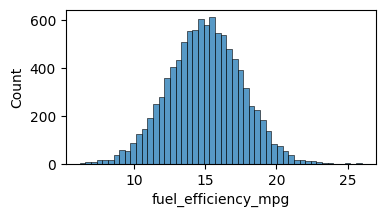

In [228]:
plt.figure(figsize=(4, 2))
sns.histplot(df.fuel_efficiency_mpg, bins=50);
plt.show()

In [229]:
# Question 1 
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [230]:
# Question 2
float(df['horsepower'].median())

149.0

In [231]:
X_train, X_val, X_test, y_train, y_val, y_test = split_df(df, 42, 'zero')

In [232]:
y_test

0       15.804354
1       14.272374
2       11.748441
3       16.485991
4       17.779704
          ...    
1935    19.961672
1936    14.651056
1937    18.404435
1938    20.502460
1939    16.816241
Name: fuel_efficiency_mpg, Length: 1940, dtype: float64

In [233]:
# Question 3

# fillna = 0
X_train, X_val, X_test, y_train, y_val, y_test = split_df(df, 42, 'zero')
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0  + X_val.dot(w)
print(round(float(rmse(y_val, y_pred)), 2))

# fillna = mean
X_train, X_val, X_test, y_train, y_val, y_test = split_df(df, 42, 'mean')
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0  + X_val.dot(w)
print(round(float(rmse(y_val, y_pred)), 2))


0.52
0.46


In [234]:
# Question 4
X_train, X_val, X_test, y_train, y_val, y_test = split_df(df, 42, 'zero')
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_val_zero.dot(w)
    print(f"r: {r}, rmse: {rmse(y_val, y_pred):.2f}")


r: 0, rmse: 0.50
r: 0.01, rmse: 0.50
r: 0.1, rmse: 0.50
r: 1, rmse: 0.50
r: 5, rmse: 0.50
r: 10, rmse: 0.50
r: 100, rmse: 0.50


In [235]:
# Question 5
X_train, X_val, X_test, y_train, y_val, y_test = split_df(df, 42, 'zero')
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmses = []
for seed in seeds:
    X_train, X_val, y_train, y_val, X_test, y_test  = split(df, seed)
    w0, w = train_linear_regression(X_train_zero, y_train)
    y_pred = w0  + X_val.dot(w)
    rmses.append(round(float(rmse(y_val, y_pred)), 4))
print (rmses)
round(float(np.std(rmses)), 3)

[2.5477, 2.5697, 2.5418, 2.5549, 2.5355, 2.4693, 2.55, 2.4724, 2.5603, 2.4768]


0.037

In [236]:
# Question 6

X_train, X_val, X_test, y_train, y_val, y_test = split_df(df, 9, 'zero')
X = np.vstack((X_train, X_val))
y = np.hstack((y_train, y_val))
w0, w = train_linear_regression_reg(X, y, r = 0.001)
y_pred = w0  + X_test.dot(w)
print (rmse(y_test, y_pred))

0.5156261299167999
